In [66]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sidetable as stb

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [67]:
df = pd.read_csv("bikes.csv", index_col = 0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [69]:
#Valores únicos. Makes sense.

In [70]:
total = df["cnt"].sum()
total

3290845

In [71]:
dia = pd.DataFrame(df[["cnt", "weekday"]].groupby("weekday"))

dia.shape

(7, 2)

In [72]:
i = 0
lista = []
while i < 7:
    a = dia[1][i]["cnt"].sum()
    i = i+1
    lista.append(a)


In [73]:
semana_cuenta = pd.DataFrame(lista)
semana_cuenta["%"] = semana_cuenta[0].apply(lambda x: x / total * 100)
semana_cuenta



,0,%
0,444027,13.492796
1,455503,13.841521
2,469109,14.254971
3,471214,14.318936
4,485395,14.749859
5,487790,14.822637
6,477807,14.519280


In [74]:
semana_cuenta["Weekday"] = ["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"]
semana_cuenta

,0,%,Weekday
0,444027,13.492796,Sunday
1,455503,13.841521,Monday
2,469109,14.254971,Tuesday
3,471214,14.318936,Wednesday
4,485395,14.749859,Thursday
5,487790,14.822637,Friday
6,477807,14.519280,Saturday


<AxesSubplot:xlabel='%', ylabel='Weekday'>

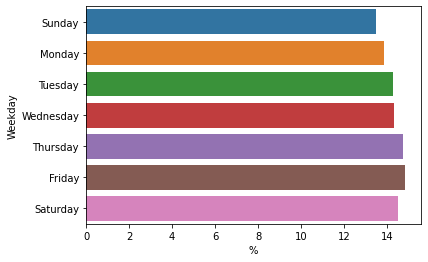

In [79]:
sns.barplot(y = "Weekday", x = "%", data = semana_cuenta)

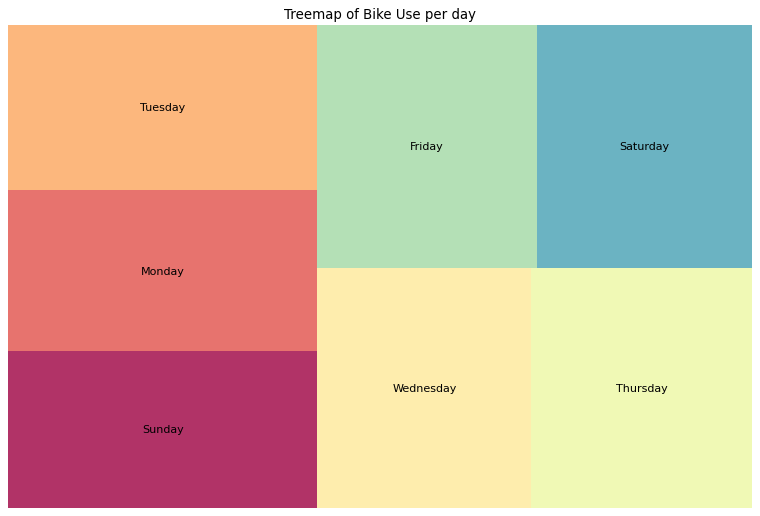

In [77]:
# pip install squarify
import squarify 



labels = ["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"]

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=semana_cuenta[0].values.tolist(), label=labels,  color=colors, alpha=.8)


plt.title('Treemap of Bike Use per day')
plt.axis('off')
plt.show()

In [82]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [83]:
weather = pd.DataFrame(df[["cnt", "weathersit"]].groupby("weathersit"))

In [86]:
i = 0
lista2 = []
for i in range(len(df["weathersit"].value_counts())):
    a = weather[1][i]["cnt"].sum()
    i = i+1
    lista2.append(a)

In [87]:
weathersit = pd.DataFrame(lista2)
weathersit

,0
0,2257952
1,995024
2,37869


In [88]:
weathersit["%"] = weathersit[0].apply(lambda x: x / total * 100)
weathersit["Tipo"] = ["1", "2", "3"]

weathersit



,0,%,Tipo
0,2257952,68.613137,1
1,995024,30.236125,2
2,37869,1.150738,3


In [99]:
labelsX = ["1: Clear, Few clouds, Partly cloudy, Partly cloudy", "2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"]

labels = ["¡Súper!", "Feo", "Tormenta"]

<AxesSubplot:>

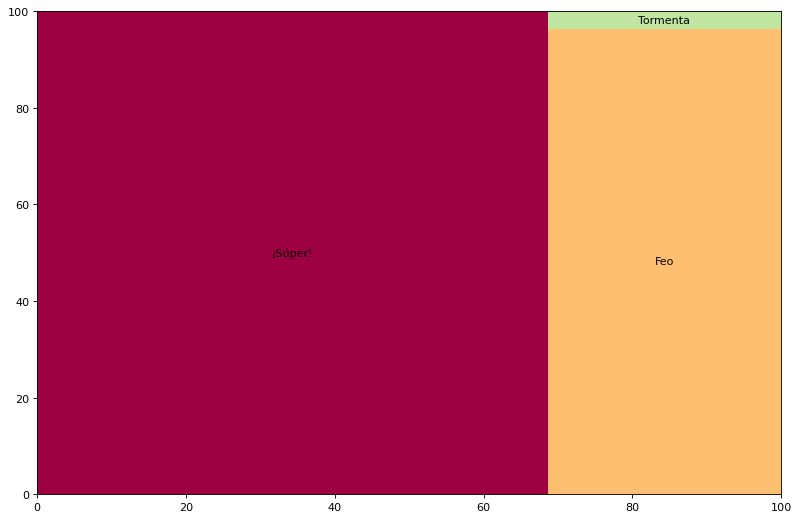

In [100]:
plt.figure(figsize=(12,8), dpi= 80)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes=weathersit["%"].values.tolist(), label=labels,  color = colors)
